In [6]:
import numpy as np
import pandas as pd
import networkx as nx

import urllib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

pd.set_option('display.max_rows', 500)

In [7]:
starting_nodes = [
    1252764865, # Nicolas Maduro
    128262354, # Diosdado Cabello
    1644228493, # Delcy Rodriguez
    14119371, # Julio Borges
    47491330, # Henrique Capriles
    102482331, # Maria Corina Machado
]

In [8]:
df = pd.read_csv('./dataset/checkpoint.csv', index_col='id')
df = df[(df.following > 0) & (~df.following_ids.isnull())]
df.head()

,username,profile_image_url,name,followers,following,following_ids,log_ratio
id,,,,,,,
1048283702697086979,stedile_mst,https://pbs.twimg.com/profile_images/143314650...,João Pedro Stedile,53921,1,76699270,10.202128
1030198380868321280,FHC,https://pbs.twimg.com/profile_images/103020226...,Fernando Henrique Cardoso,333169,1,2688070376,12.023258
260419394,rafaellacava10,https://pbs.twimg.com/profile_images/899720067...,Rafael Lacava,414043,5,"49751816,128262354,461922813,1252764865,15007299",11.141966
144927419,citaconsilvio,https://pbs.twimg.com/profile_images/908194706...,Silvio Rodríguez,167021,6,"1252764865,199064053,371783889,82114479,140996...",10.079965
185757079,ConTeodoro,https://pbs.twimg.com/profile_images/125872131...,Teodoro Petkoff,51835,6,"342363193,73509536,252417868,70689901,86434802...",8.909911


In [9]:
def prepare_data(df):
    available_ids = df.index
    info = {}
    ntx = {}
    for index, row in df.iterrows():
        info[index] = {
            'username': row['username'],
            'name': row['name'],
            'profile_image_url': row['profile_image_url'],
            'followers': row['followers'],
            'following': row['following'],
            'log_ratio': row['log_ratio'],
            'degree': row.get('degree', 0.02),
            'pagerank': row.get('pagerank', 0.02),
            'betweenness_centrality': row.get('betweenness_centrality', 0.02),
        }
        
        ntx[index] = [int(i) for i in row['following_ids'].split(',') if int(i) in available_ids]
    
    return info, ntx

In [10]:
info, ntx = prepare_data(df)

In [11]:
dg = nx.DiGraph(ntx)

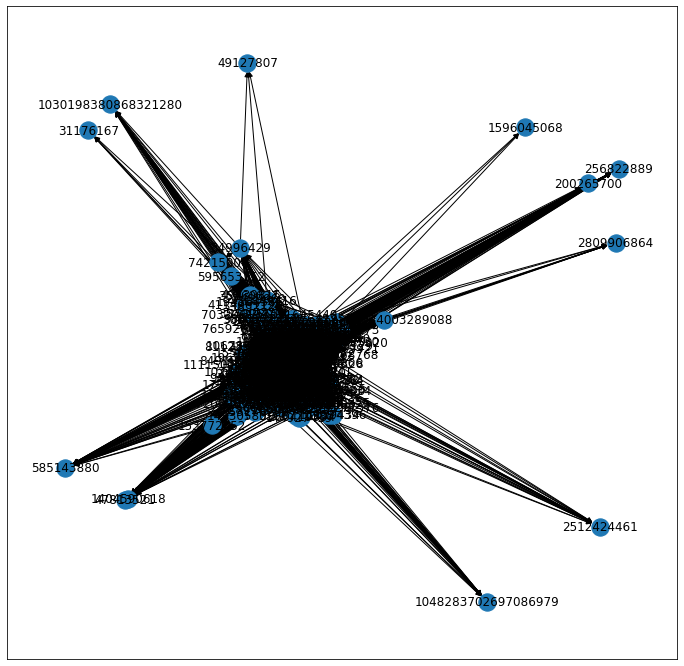

In [21]:
plt.figure(figsize=(12,12)) 
nx.draw_networkx(dg)
plt.show()

In [17]:
centrality_measures = pd.DataFrame({
    'degree': dict(nx.degree(dg, weight=None)),
    'pagerank': dict(nx.pagerank(dg, weight=None)),
    'betweenness_centrality': dict(nx.betweenness_centrality(dg, weight=None)),
    })

df_wcentrality = df.join(centrality_measures)

,username,profile_image_url,name,followers,following,following_ids,log_ratio,degree,pagerank,betweenness_centrality
id,,,,,,,,,,
1404590618,HassanRouhani,https://pbs.twimg.com/profile_images/830606478...,Hassan Rouhani,1149571,7,"259372802,886707402,1680077496,2164583325,1371...",11.875458,44,0.006959,0.000009
47813521,JZarif,https://pbs.twimg.com/profile_images/144848850...,Javad Zarif,1672598,11,"3131334417,1278368043777875968,122226054796773...",11.844982,50,0.006819,0.000004
1252764865,NicolasMaduro,https://pbs.twimg.com/profile_images/116656018...,Nicolás Maduro,3979281,115,"1402349288257200136,126469834,133373873,313720...",10.443022,357,0.006427,0.006575
2670726740,LulaOficial,https://pbs.twimg.com/profile_images/143230828...,Lula,2825168,2718,"250439468,68440549,137548563,85859074,42967510...",6.946059,229,0.005622,0.006904
138814032,CFKArgentina,https://pbs.twimg.com/profile_images/111201469...,Cristina Kirchner,5977835,241,"2353385744,1132308934948282368,149991703,14003...",10.114631,257,0.005362,0.001755
39176902,jguaido,https://pbs.twimg.com/profile_images/125317184...,Juan Guaidó,2636370,2849,"478049133,2168699356,1377362439151443973,27669...",6.829839,674,0.005156,0.013282
720786569792253952,evoespueblo,https://pbs.twimg.com/profile_images/118481538...,Evo Morales Ayma,1245959,30,"1357969682683334657,149991703,1976143068,10250...",10.601429,229,0.005153,0.000573
47491330,hcapriles,https://pbs.twimg.com/profile_images/378800000...,Henrique Capriles R.,7107479,1984,"772150676919054340,268860147,1584726798,146976...",8.183284,916,0.004993,0.044479
4119914644,mbachelet,https://pbs.twimg.com/profile_images/104469859...,Michelle Bachelet,824616,165,"16079505,3232924232,2978526405,770650559699386...",8.510685,195,0.004642,0.001035


In [ ]:
df_wcentrality.sort_values('pagerank', ascending=False).head(60)

In [13]:
df_wcentrality.sort_values('degree', ascending=False).head(50)

,username,profile_image_url,name,followers,following,following_ids,log_ratio,degree,pagerank,betweenness_centrality
id,,,,,,,,,,
47491330,hcapriles,https://pbs.twimg.com/profile_images/378800000...,Henrique Capriles R.,7107479,1984,"772150676919054340,268860147,1584726798,146976...",8.183284,916,0.004993,0.044479
102482331,MariaCorinaYA,https://pbs.twimg.com/profile_images/126529917...,María Corina Machado,4315599,4480,"777207848271052801,374699026,488807181,1229845...",6.870145,878,0.004618,0.038486
242739974,osmarycnn,https://pbs.twimg.com/profile_images/106313379...,Osmary Hernandez,336920,4697,"1289032362836267010,53424502,142021639,1326298...",4.272709,828,0.001887,0.010549
62917505,liliantintori,https://pbs.twimg.com/profile_images/132261467...,Lilian Tintori,3161090,5022,"463216578,279649054,16170421,111021184,2496775...",6.444645,795,0.003783,0.018434
39874069,ANAVILLALBA,https://pbs.twimg.com/profile_images/500283799...,Ana Karina Villalba 🇻🇪,531749,4650,"106993207,1004623830118293508,60783724,3471817...",4.739089,773,0.001447,0.006309
72627916,carlaangola,https://pbs.twimg.com/profile_images/133167496...,Carla Angola TV,2727870,2550,"23791197,2305370629,1415372770452647938,214942...",6.974791,754,0.002348,0.008557
56684856,dianacaroruiz,https://pbs.twimg.com/profile_images/136475503...,Diana Carolina Ruiz,560964,4034,"4725834712,92830907,1216433080879198208,125348...",4.934650,749,0.001510,0.006527
75883996,AlbertoRavell,https://pbs.twimg.com/profile_images/133849135...,Alberto Ravell,2182409,2093,"1119658682,938495509026746368,208267585,132069...",6.949108,729,0.002494,0.009169
34140316,soyfdelrincon,https://pbs.twimg.com/profile_images/127983444...,Fernando Del Rincon,3617403,3594,"167395220,158891337,179717419,225101516,757674...",6.913968,727,0.003506,0.019289


# Network Visualization - Top 50 by PageRank

In [37]:
top_pr = centrality_measures.sort_values('pagerank', ascending=False).head(50).index
info, ntx = prepare_data(df_wcentrality.loc[top_pr])

pr_dg = nx.DiGraph(ntx)
nx.set_node_attributes(pr_dg, info)
pr_dg.remove_nodes_from(list(nx.isolates(pr_dg)))

bb = nx.edge_betweenness_centrality(pr_dg, normalized=True)
nx.set_edge_attributes(pr_dg, bb, "betweenness")

#attrs = { e:{'edge_color': (1,0,0), 'alpha': 0.5} for n in starting_nodes[:3] for e in pr_dg.out_edges(n)}
#nx.set_edge_attributes(pr_dg, attrs)

#attrs = { e:{'edge_color': (0,0,1), 'alpha': 0.5} for n in starting_nodes[4:] for e in pr_dg.out_edges(n)}
#nx.set_edge_attributes(pr_dg, attrs)

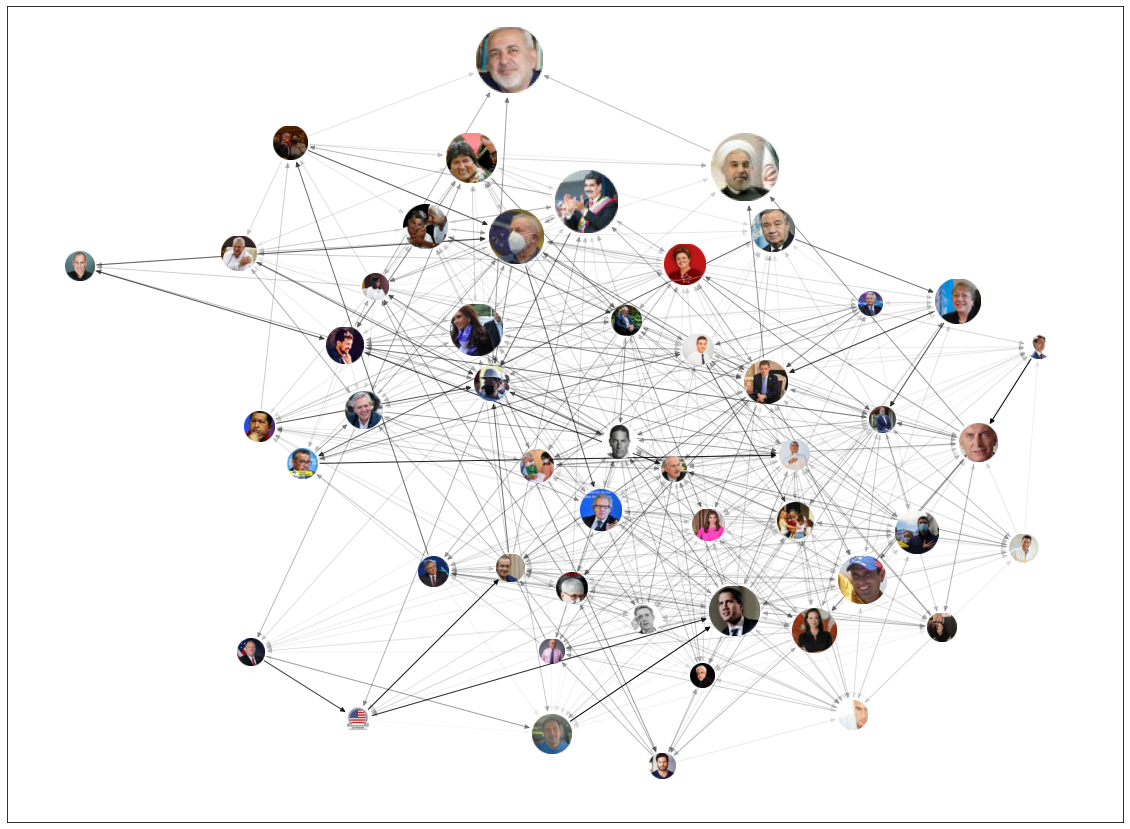

In [40]:
pos = nx.kamada_kawai_layout(pr_dg)

fig=plt.figure(figsize=(20,15))
ax=plt.subplot(111)

for u,v, attr in pr_dg.edges(data=True):
    nx.draw_networkx_edges(pr_dg,
                           pos,
                           edgelist=[(u,v)],
                           edge_color=attr.get('edge_color', 'k'),
                           alpha= max(0.01, min(attr.get('betweenness') * 50, 1)),
                           arrows=True,
                           min_source_margin = pr_dg.nodes[u]['pagerank'] * 5500,
                           min_target_margin = pr_dg.nodes[v]['pagerank'] * 5500,
                          )

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

for n, attr in pr_dg.nodes(data=True):
    piesize= attr['pagerank'] * 9 # this is the image size
    p2=piesize/2.0

    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    
    # Start to round Image
    img = Image.open(urllib.request.urlopen(attr['profile_image_url'])).convert("RGB")
    npImage=np.array(img)
    h,w=img.size

    # Create same size alpha layer with circle
    factor = 5
    alpha = Image.new('L', (h*factor, w*factor), 0)
    draw = ImageDraw.Draw(alpha)
    draw.pieslice([0,0,h*factor,w*factor],0,360,fill=255)
    alpha = alpha.resize(img.size, Image.ANTIALIAS)
    
    # Convert alpha Image to numpy array
    npAlpha=np.array(alpha)

    # Add alpha layer to RGB
    npImage=np.dstack((npImage,npAlpha))

    # Save with alpha
    img = Image.fromarray(npImage)
    
    #a.imshow(Image.open(urllib.request.urlopen(attr['profile_image_url'])))
    a.imshow(img)
    a.axis('off')

plt.show()

In [35]:
starting_nodes = [
    1252764865, # Nicolas Maduro
    128262354, # Diosdado Cabello
    1644228493, # Delcy Rodriguez
    14119371, # Julio Borges
    47491330, # Henrique Capriles
    102482331, # Maria Corina Machado
]

initial_nodes = df.loc[starting_nodes]

In [5]:
oficialismo_following = set(int(i) for i in ','.join(initial_nodes.iloc[:3].following_ids.values).split(','))
oposicion_following = set(int(i) for i in  ','.join(initial_nodes.iloc[3:].following_ids.values).split(','))
neutral_following = oposicion_folowing.intersection(oficialismo_folowing)
oficialismo_following = oficialismo_folowing - neutral_following
oposicion_following = oposicion_folowing - neutral_following

NameError: name 'initial_nodes' is not defined

In [4]:
print(len(oficialismo_following))
print(len(oposicion_following))
print(len(neutral_following))

NameError: name 'oficialismo_following' is not defined

In [6]:
data = {
    'oposicion': oposicion_folowing,
    'oficialismo': oficialismo_folowing,
    'neutral_folowing': neutral_folowing,
}
series = pd.DataFrame(data)
series.plot.bar()

NameError: name 'oposicion_folowing' is not defined

In [39]:
# Veamos quienes pasaron el filtrado
available_ids = set(df.index)
print( len(available_ids.intersection(oficialismo_folowing)) )
print( len(available_ids.intersection(oposicion_folowing)) )

231
675


In [ ]:
len(df.index)

In [ ]:
df = df.drop(ss)